In [4]:
from radd import build, models, fit, vis
from radd.toolbox import theta

In [27]:
mx = build.Model(data=prodf_store.prodata, kind='xpro', dynamic='hyp', depends_on={'v':'pGo'}, tb=.55)
mx.make_optimizer(tol=1.e-20, ntrials=10000, maxfev=5000, multiopt=True)
opt = mx.opt
mx.make_simulator()
simfx = mx.simulator.sim_fx

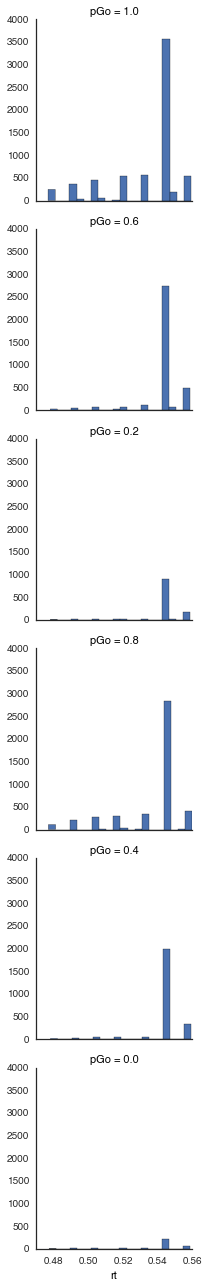

In [50]:
sub = mx.data.query('rt<=.550&choice=="go"')
go = mx.data.query('choice=="go"')
g = sns.FacetGrid(go, row='pGo')
g.map(plt.hist, 'rt', bins=20)

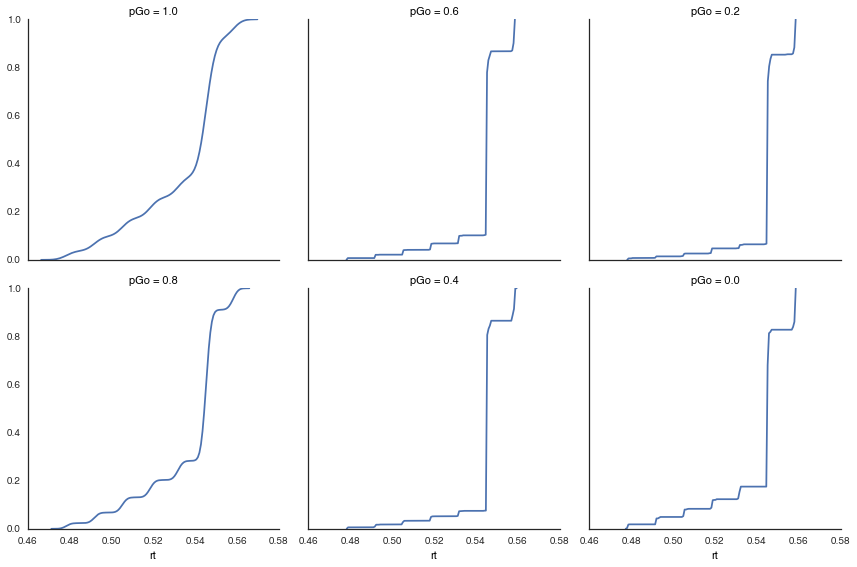

In [57]:
g = sns.FacetGrid(go, col='pGo', size=4, col_wrap=3)
g.map(sns.kdeplot, 'rt', cumulative=True)

In [34]:
np.median(sub.query('choice=="go"').groupby('pGo').std()['rt'])/sub.groupby('pGo').std()['rt']

pGo
0.0    3.0832
0.2    2.7619
0.4    1.8001
0.6    1.3515
0.8    0.7796
1.0    0.6921
Name: rt, dtype: float64

In [28]:
x = mx.observed.std()[6:]
np.median(x)/x

hi10     0.2304
hi30     0.3066
hi50     0.5455
hi70     1.8534
hi90    29.9912
lo10     0.3631
lo30     0.7928
lo50     1.3539
lo70    74.2104
lo90    18.7340
dtype: float64

In [ ]:
mx.optimize()

In [9]:
vpopt={'a': array([ 0.48672,  0.48672,  0.48672,  0.48672,  0.48672,  0.48672]), 'v_0': 1.4204744923605306, 'xb': array([ 1.86673,  1.86673,  1.86673,  1.86673,  1.86673,  1.86673]), 'v': array([ 1.42047,  1.54611,  1.67993,  1.75729,  1.87396,  1.89252], dtype=np.float32), 'tr': array([ 0.29334,  0.29334,  0.29334,  0.29334,  0.29334,  0.29334]), 'v_100': 1.8925194341059219, 'v_60': 1.7572925581377903, 'v_80': 1.8739583821515711, 'v_20': 1.5461146129935177, 'v_40': 1.6799320687772294}


trpopt={'tr_80': 0.28706936544590755, 'a': array([ 0.33093,  0.33093,  0.33093,  0.33093,  0.33093,  0.33093]), 'xb': array([ 1.39482,  1.39482,  1.39482,  1.39482,  1.39482,  1.39482]), 'tr_0': 0.3629863222975761, 'tr': array([ 0.36299,  0.34382,  0.32439,  0.30814,  0.28707,  0.28049], dtype=np.float32), 'tr_60': 0.30813672200937137, 'tr_20': 0.34381508967070357, 'tr_40': 0.32439120823028805, 'v': array([ 1.35891,  1.35891,  1.35891,  1.35891,  1.35891,  1.35891]), 'tr_100': 0.28048943734544829}

apopt={'a': array([ 0.55367,  0.51675,  0.4817 ,  0.46659,  0.426  ,  0.41928], dtype=np.float32), 'a_20': 0.51675459834178972, 'a_0': 0.55366998499039621, 'a_100': 0.41928162094629035, 'tr': array([ 0.27274,  0.27274,  0.27274,  0.27274,  0.27274,  0.27274]), 'a_80': 0.42599669484687097, 'xb': array([ 1.02497,  1.02497,  1.02497,  1.02497,  1.02497,  1.02497]), 'a_60': 0.46659190997557665, 'a_40': 0.48169580764110997, 'v': array([ 1.65448,  1.65448,  1.65448,  1.65448,  1.65448,  1.65448])}

In [ ]:
popt={'tr_80': 0.33951513531300465, 'a': array([ 0.34218,  0.34218,  0.34218,  0.34218,  0.34218,  0.34218]), 'v': array([ 1.44044,  1.27013,  1.59645,  1.27281,  1.82057,  1.36874], dtype=np.float32), 'v_0': 1.4404377929707215, 'xb': array([ 1.,  1.,  1.,  1.,  1.,  1.]), 'tr_0': 0.35675266724138277, 'tr': array([ 0.35675,  0.31196,  0.33909,  0.26999,  0.33952,  0.252  ], dtype=np.float32), 'tr_60': 0.2699869312165879, 'tr_20': 0.31195868332328336, 'v_100': 1.3687399223750985, 'tr_40': 0.33908665087267442, 'v_60': 1.2728088593327467, 'tr_100': 0.25199784169629791, 'v_80': 1.8205659366828479, 'v_20': 1.2701251276032504, 'v_40': 1.5964496804953119}

In [13]:
a_yhat = array([0.9369, 0.7923, 0.5420, 0.3553, 0.1272, 0.0738, 0.4759, 0.5019, 0.5159, 0.5279, 0.5415, 0.5158, 0.5290, 0.5370, 0.5430, 0.5479])
vtr_yhat = array([0.9369, 0.7923, 0.5420, 0.3553, 0.1272, 0.0738, 0.4759, 0.5019, 0.5159, 0.5279, 0.5415, 0.5158, 0.5290, 0.5370, 0.5430, 0.5479])


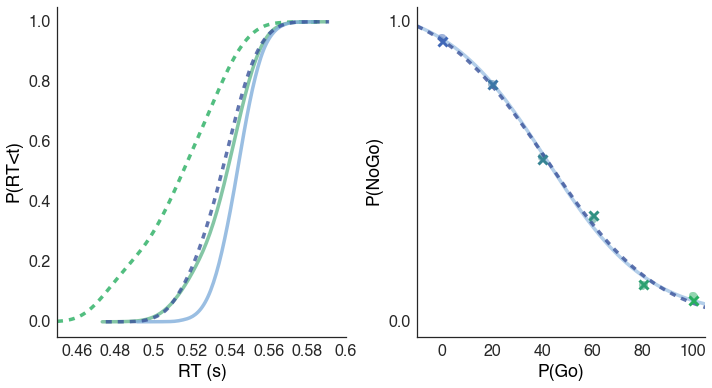

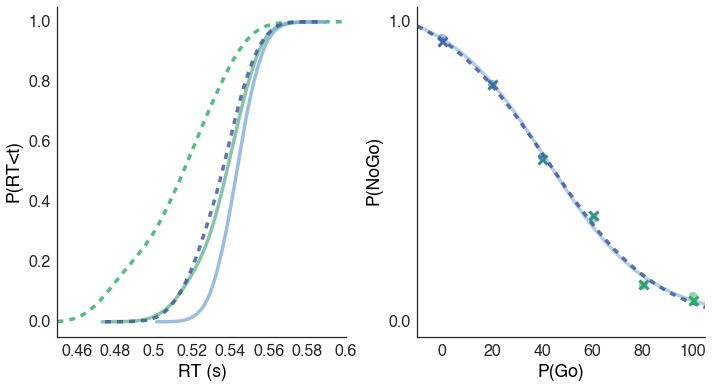

In [14]:
vis.plot_fits(m.avg_y, a_yhat, kind='pro', xlim=(.45,.6))
vis.plot_fits(m.avg_y, vtr_yhat, kind='pro', xlim=(.45,.6))

In [ ]:
vm = build.Model(data=prodf_store.prodata, kind='xpro', dynamic='hyp', depends_on={'v':'pGo'})
tm = build.Model(data=prodf_store.prodata, kind='xpro', dynamic='hyp', depends_on={'tr':'pGo'})
am = build.Model(data=prodf_store.prodata, kind='xpro', dynamic='hyp', depends_on={'a':'pGo'})

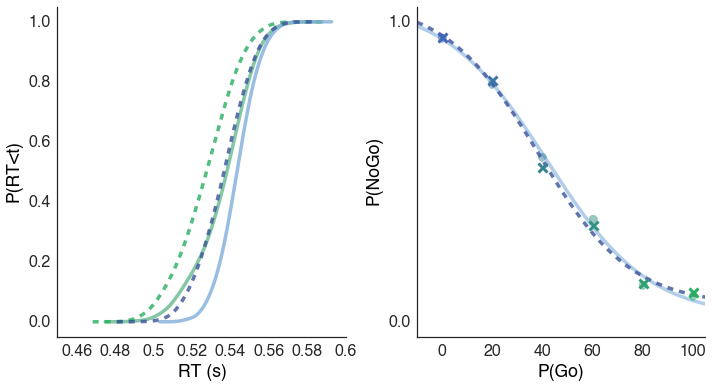

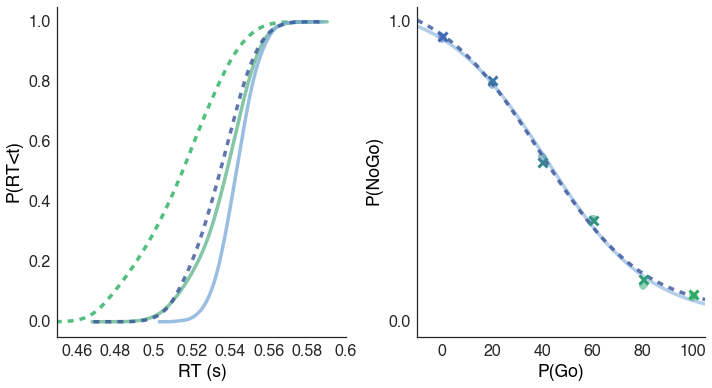

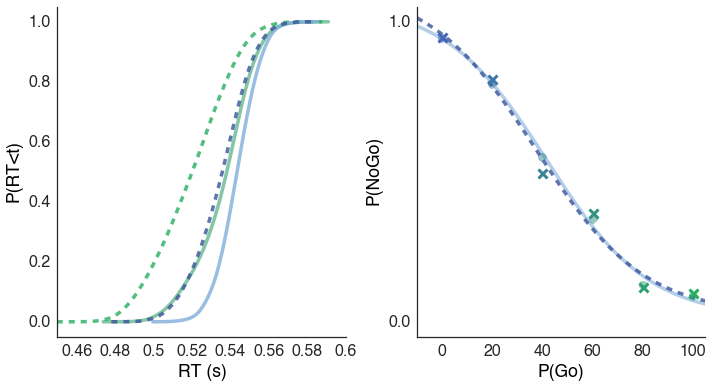

In [10]:
p = [vpopt, trpopt, apopt]
for i, m in enumerate([vm, tm, am]):
      #yh = m.simulate(p[i])
      vis.plot_fits(m.avg_y, yh, kind='pro', xlim=(.45,.6))

In [21]:
mx.tb=.555
mx.fitparams['tb']=.555
mx.simulator.tb=.555

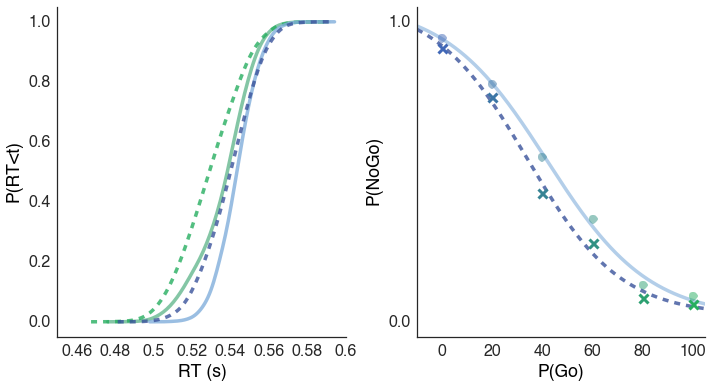

In [22]:

vis.plot_fits(mx.avg_y, simfx(popt), kind='pro', xlim=(.45,.6))